In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("Dataset is ready.")

Dataset is ready.


✅ Decision Tree trained.


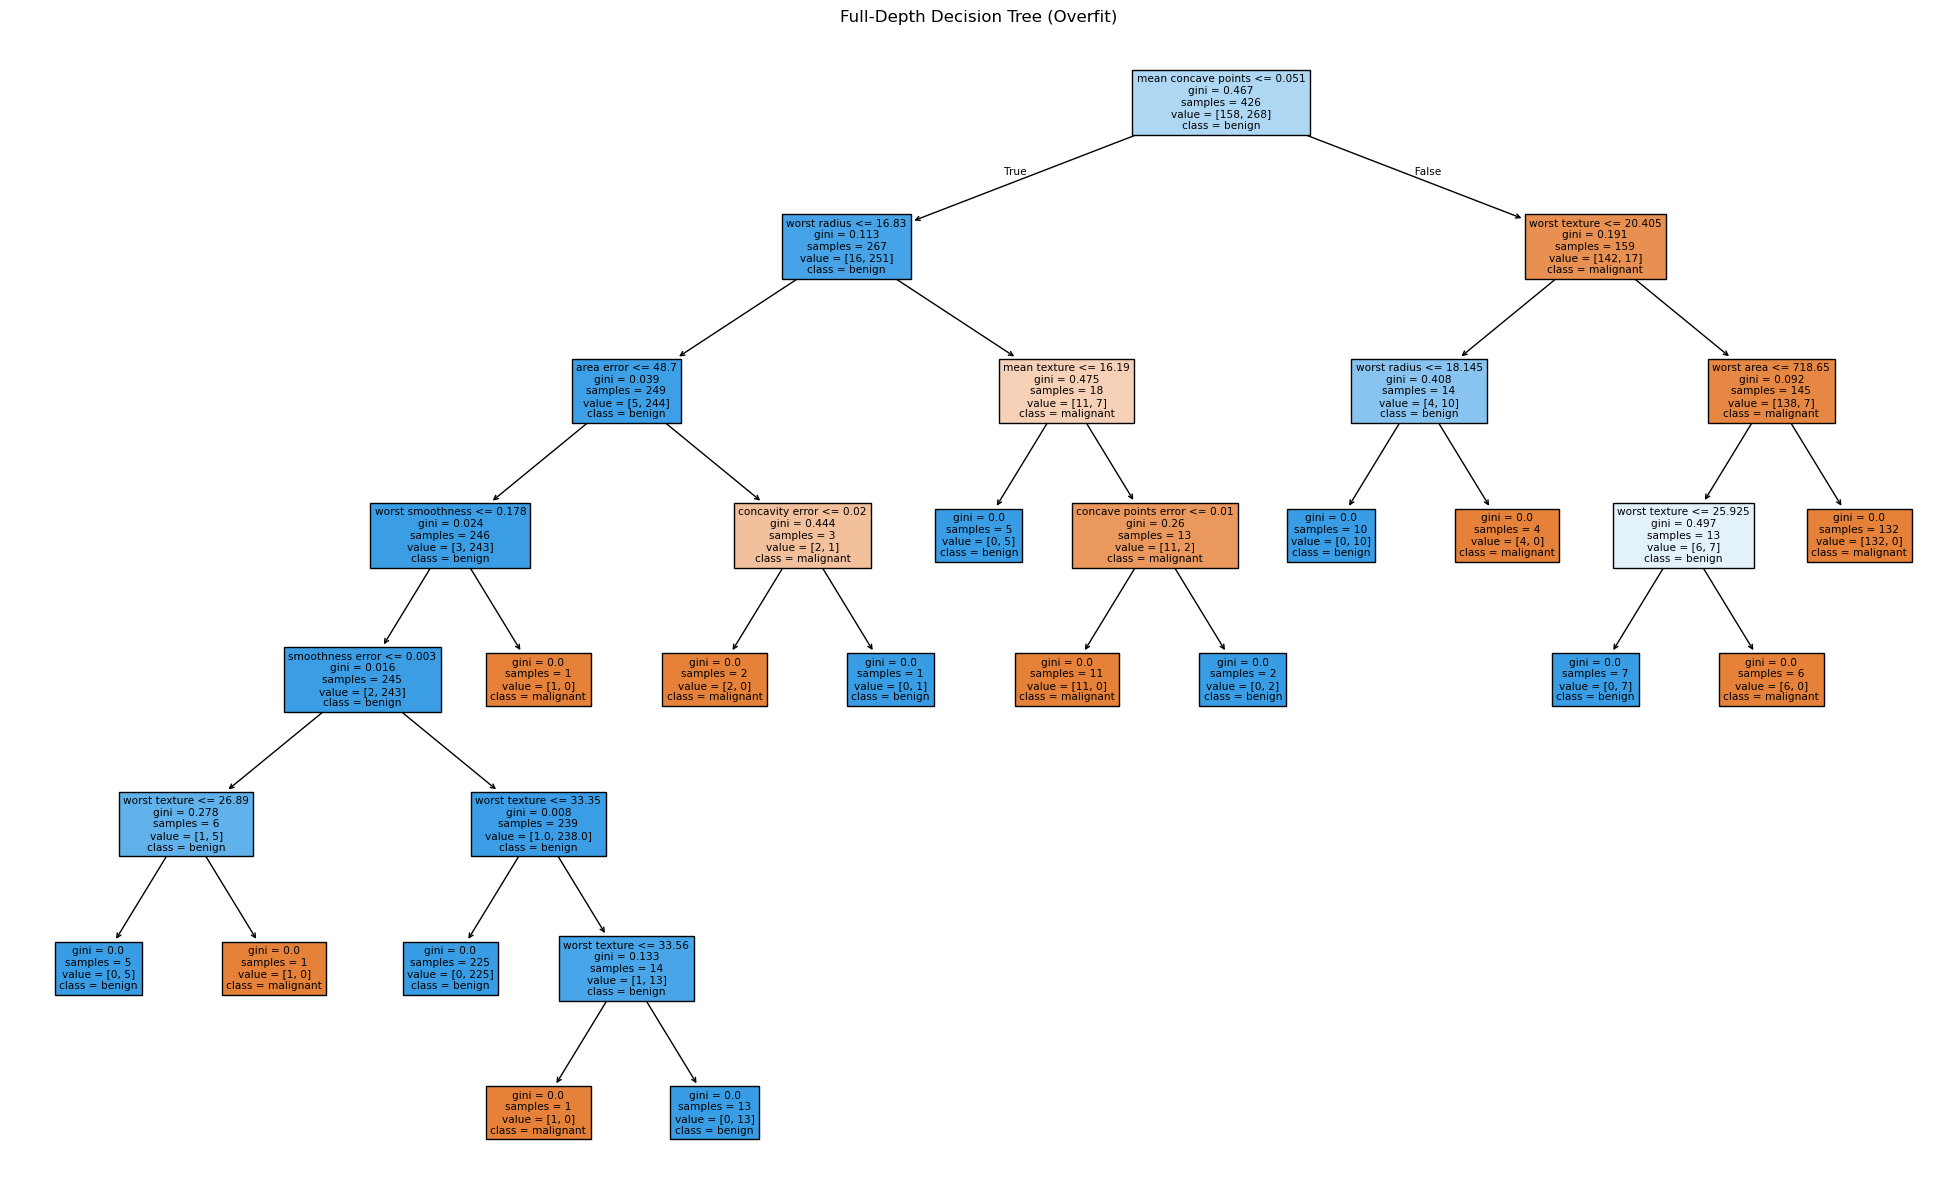

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Train a default decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
print("✅ Decision Tree trained.")

# 2. Visualize the tree
plt.figure(figsize=(25, 15))
plot_tree(tree_model,
          feature_names=cancer.feature_names,
          class_names=cancer.target_names,
          filled=True)
plt.title("Full-Depth Decision Tree (Overfit)")
plt.show()

Full Tree Training Accuracy: 1.000 (Perfectly memorized the data)
Full Tree Testing Accuracy: 0.951 (Performs worse on new data)

Pruned Tree Training Accuracy: 0.972
Pruned Tree Testing Accuracy: 0.958 (Better generalization!)


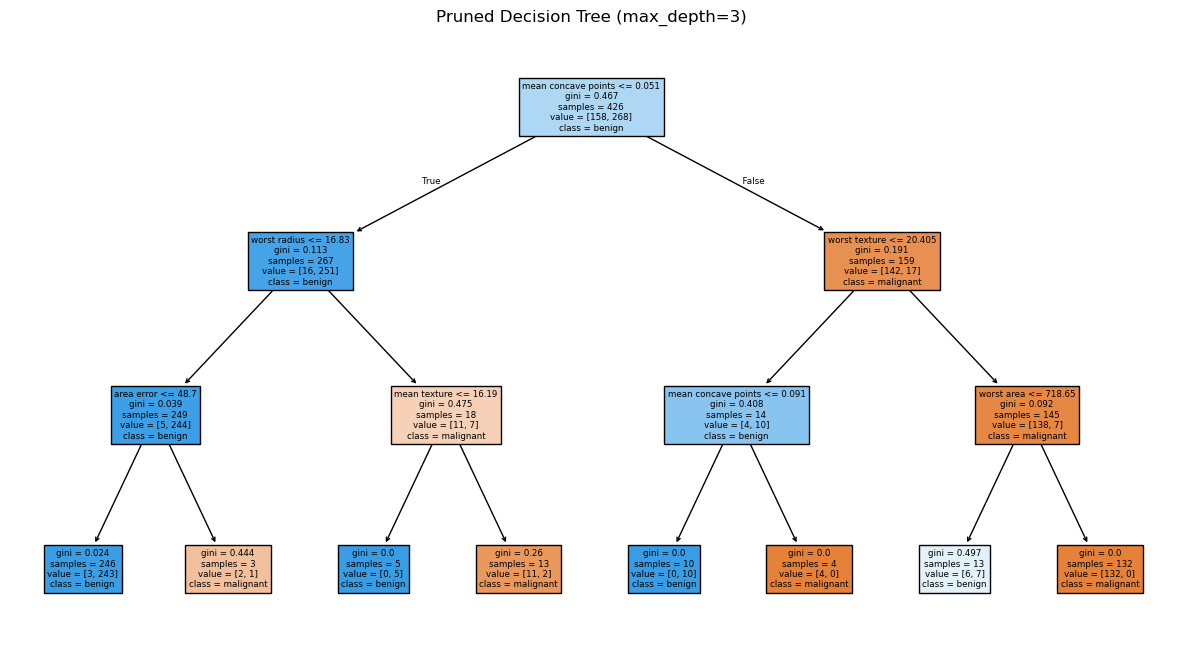

In [3]:
from sklearn.metrics import accuracy_score

# Check accuracy of the full-depth tree
train_acc = accuracy_score(y_train, tree_model.predict(X_train))
test_acc = accuracy_score(y_test, tree_model.predict(X_test))
print(f"Full Tree Training Accuracy: {train_acc:.3f} (Perfectly memorized the data)")
print(f"Full Tree Testing Accuracy: {test_acc:.3f} (Performs worse on new data)")

# Create and train a pruned tree to prevent overfitting
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)

# Check accuracy of the pruned tree
pruned_train_acc = accuracy_score(y_train, pruned_tree.predict(X_train))
pruned_test_acc = accuracy_score(y_test, pruned_tree.predict(X_test))
print(f"\nPruned Tree Training Accuracy: {pruned_train_acc:.3f}")
print(f"Pruned Tree Testing Accuracy: {pruned_test_acc:.3f} (Better generalization!)")

plt.figure(figsize=(15, 8))
plot_tree(pruned_tree,
          feature_names=cancer.feature_names,
          class_names=cancer.target_names,
          filled=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Compare test accuracies
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Single Pruned Tree Test Accuracy: {pruned_test_acc:.3f}")
print(f"Random Forest Test Accuracy:     {rf_test_acc:.3f} (Higher is better!)")

Single Pruned Tree Test Accuracy: 0.958
Random Forest Test Accuracy:     0.965 (Higher is better!)


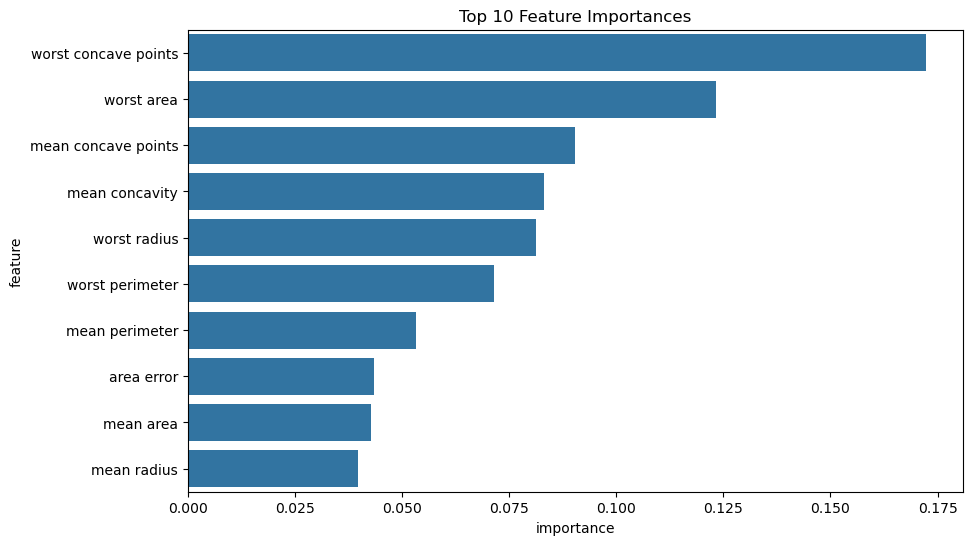

In [5]:
import pandas as pd
import seaborn as sns

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': cancer.feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("\n--- Cross-Validation Results ---")
print(f"Scores for each fold: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.3f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.3f}")


--- Cross-Validation Results ---
Scores for each fold: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Average CV Score: 0.956
Standard Deviation of CV Scores: 0.023
